# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment.

In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
train_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
test_data=pd.read_csv('test.csv')

In [5]:
test_data.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


# Checking the basic details of the dataset

In [6]:
train_data.shape

(913000, 4)

In [7]:
test_data.shape

(45000, 4)

In [8]:
# Time Range
train_data["date"].min(), train_data["date"].max(), test_data["date"].min(), test_data["date"].max()

('2013-01-01', '2017-12-31', '2018-01-01', '2018-03-31')

In [9]:
# How many items are in the store?
train_data.groupby(["store"])["item"].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

In [10]:
# Summary Stats for each store
train_data.groupby(["store"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
       count      sum       mean median        std min  max
store                                                      
1      91300  4315603  47.268379   44.0  24.006252   1  155
2      91300  6120128  67.033165   62.0  33.595810   3  231
3      91300  5435144  59.530602   55.0  29.974102   3  196
4      91300  5012639  54.902946   51.0  27.733097   4  186
5      91300  3631016  39.770164   37.0  20.365757   2  130
6      91300  3627670  39.733516   37.0  20.310451   0  134
7      91300  3320009  36.363735   34.0  18.684825   1  122
8      91300  5856169  64.142048   60.0  32.231751   4  204
9      91300  5025976  55.049025   51.0  27.832186   4  195
10     91300  5360158  58.709288   54.0  29.554994   3  187

In [11]:
# Summary Stats for each item
train_data.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     18260   401384  21.981599   21.0   8.468922   1   59
2     18260  1069564  58.574151   56.0  20.093015   9  150
3     18260   669087  36.642223   35.0  13.179441   7  104
4     18260   401907  22.010241   21.0   8.403898   0   66
5     18260   335230  18.358708   18.0   7.265167   1   50
6     18260  1068281  58.503888   56.0  20.174898  11  148
7     18260  1068777  58.531051   56.0  20.146002  11  141
8     18260  1405108  76.950055   74.0  26.130697  15  181
9     18260   938379  51.389869   49.5  17.790158   6  134
10    18260  1337133  73.227437   70.0  24.823725  14  175
11    18260  1271925  69.656353   67.0  23.744732  11  170
12    18260  1271534  69.634940   67.0  23.738663  12  170
13    18260  1539621  84.316594   81.0  28.311031  20  210
14    18260  1071531  58.681873   56.0  20.079860  12  152
15    18260  1607442  88.030778   85.0  29.522852  17  231
16    18260   468480  25.656079   25.0   9.603270   2   70
17    18260   602486  32.994852   32.0  11.967610   4   83
18    18260  1538876  84.275794   81.0  28.430621  18  208
19    18260   736892  40.355531   39.0  14.332645   5   99
20    18260   867641  47.515936   46.0  16.490487   9  127
21    18260   736190  40.317087   39.0  14.338006   7  109
22    18260  1469971  80.502245   78.0  27.118163  14  214
23    18260   534979  29.297864   28.0  10.819549   3   81
24    18260  1205975  66.044633   64.0  22.531555  14  156
25    18260  1473334  80.686418   78.0  27.238817  18  193
26    18260   869981  47.644085   46.0  16.723912   8  119
27    18260   402628  22.049726   21.0   8.461641   1   59
28    18260  1604713  87.881325   85.0  29.501781  16  206
29    18260  1271240  69.618839   67.0  23.635631  15  173
30    18260   736554  40.337021   39.0  14.363331   5  115
31    18260  1070845  58.644304   57.0  20.104705  10  159
32    18260   803107  43.981763   42.0  15.574556   5  119
33    18260  1270183  69.560953   67.0  23.718343  15  169
34    18260   469935  25.735761   25.0   9.617910   2   79
35    18260  1201541  65.801807   63.0  22.461990  12  168
36    18260  1406548  77.028916   74.0  26.067440  16  188
37    18260   534258  29.258379   28.0  10.771547   3   74
38    18260  1470330  80.521906   77.0  27.141799  15  188
39    18260   801311  43.883406   42.0  15.511550   7  112
40    18260   534094  29.249398   28.0  10.822959   3   74
41    18260   401759  22.002136   21.0   8.402470   2   60
42    18260   669925  36.688116   35.0  13.215112   5   96
43    18260   936635  51.294359   49.0  17.801008   9  126
44    18260   536811  29.398193   28.0  10.797738   3   78
45    18260  1471467  80.584173   78.0  27.318402  18  205
46    18260  1070764  58.639869   56.0  20.220879  11  150
47    18260   401781  22.003341   21.0   8.420102   2   61
48    18260   937703  51.352848   49.0  17.881917   8  130
49    18260   535663  29.335323   28.0  10.874788   3   77
50    18260  1203009  65.882202   63.0  22.416031  12  164

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [14]:
train_data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [15]:
test_data.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


In [16]:
train_data.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [17]:
test_data.nunique()

id       45000
date        90
store       10
item        50
dtype: int64

# Exploratory Data Analysis(EDA)

# a)Univariate Analysis(Analysis using one variable)

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


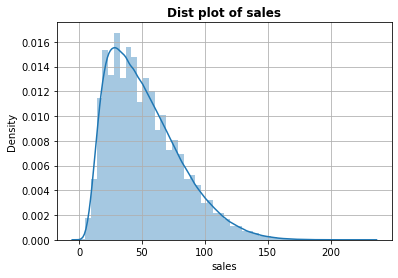

In [18]:
sns.distplot(train_data['sales'])
plt.title('Dist plot of sales',fontweight="bold")
plt.grid()

In [19]:
#Maximum number of items sold at a particular store on a particular date is above 200

# b)Bi/Multivariate Analysis(Analysis using two or more than two variables)


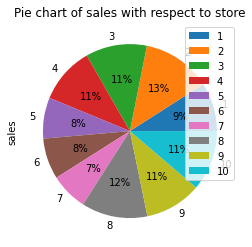

In [20]:
train_data.groupby(['store']).sum().plot(kind='pie',y='sales',autopct='%1.0f%%',title='Pie chart of {} with respect to {}'.format('sales','store')) 
plt.show() 

In [21]:
#Store 2 has maximum sale of 13% compared to other stores

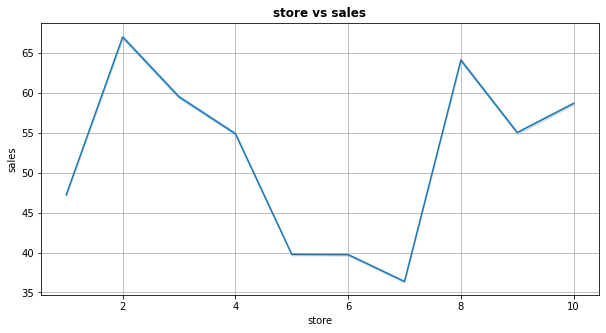

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_data,x='store',y='sales')
plt.title('store vs sales',fontweight="bold")
plt.grid()

In [23]:
#From the visualization, it is clear that the stores with ID 2 and 8 have higher average sales than the remaining stores and is a clear indication that they are doing good money!
#Whereas store with ID 7 has very poor performance in terms of average sales.

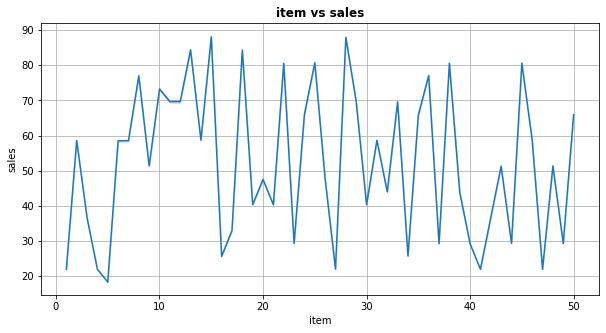

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_data,x='item',y='sales')
plt.title('item vs sales',fontweight="bold")
plt.grid()

In [25]:
#Top items with highest average sale are 15, 28, 13, 18 and with least average sales are 5, 1, 41 and so on.

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'item'}>],
       [<AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>]],
      dtype=object)

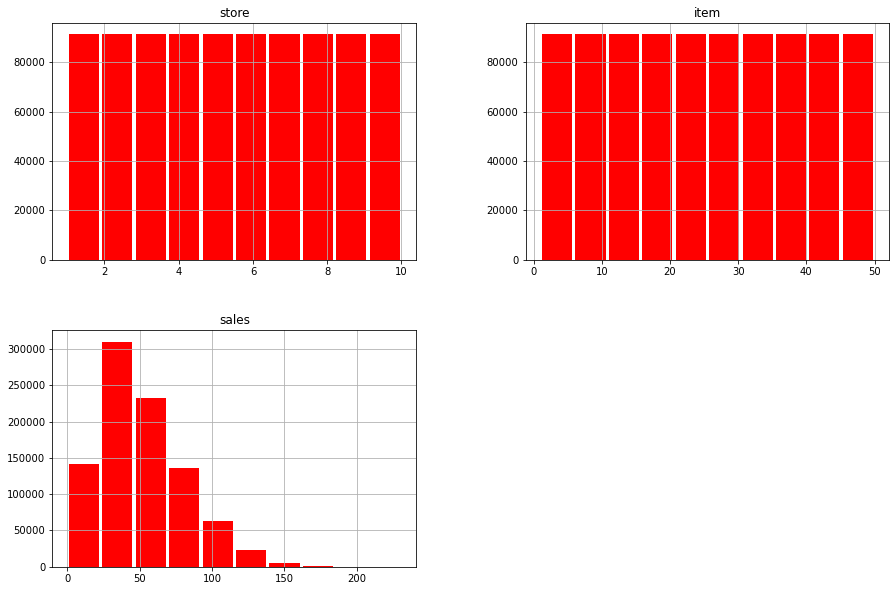

In [26]:
freqgraph=train_data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(15,10),rwidth=0.9,color='red')

# Preprocessing

# a)Handling missing values

In [27]:
#Checking for null values
train_data.isna().sum().to_frame().style.bar(color="red")

,0
date,0
store,0
item,0
sales,0


In [28]:
test_data.isna().sum().to_frame().style.bar(color="red")

,0
id,0
date,0
store,0
item,0


In [29]:
#No missing values found for both the train and test dataset

# b)Handling Outlier

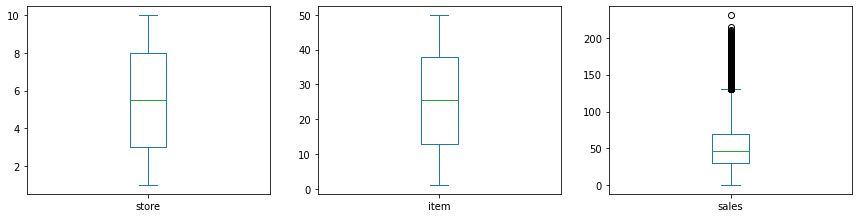

In [30]:
train_data.plot(kind="box",subplots=True,layout=(5,4),figsize=(20,20))
plt.show()

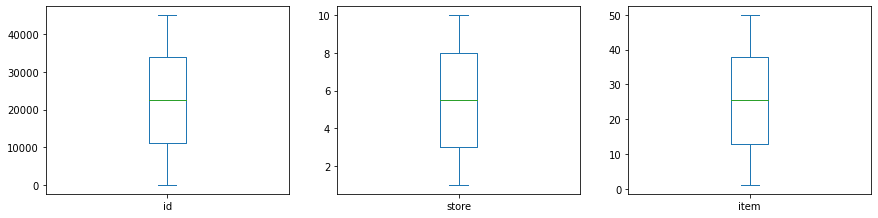

In [31]:
test_data.plot(kind="box",subplots=True,layout=(5,4),figsize=(20,20))
plt.show()

In [32]:
#From the boxplot we can see that sales column has outliers
#But if we remove the outliers which are greater than upper limit then we will remove the data of those stores and items which have more sales
#So it is better to keep the outliers of sales

# Feature Engineering

In [33]:
#In order to search for seasonalities, date variable will be used to derive new features and different time periods will be created
train_data['date'] = pd.to_datetime(train_data['date'], format="%Y-%m-%d")
# per 1 store, 1 item
train_df = train_data[train_data['store']==1]
train_df = train_df[train_data['item']==1]
train_df['year'] = train_data['date'].dt.year
train_df['month'] = train_data['date'].dt.month
train_df['day'] = train_data['date'].dt.dayofyear
train_df['weekday'] = train_data['date'].dt.weekday

train_df

/var/folders/5r/zxv696r558jf09kl_8b9gyvr0000gn/T/ipykernel_7571/3826455938.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df = train_df[train_data['item']==1]


,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5
...,...,...,...,...,...,...,...,...
1821,2017-12-27,1,1,14,2017,12,361,2
1822,2017-12-28,1,1,19,2017,12,362,3
1823,2017-12-29,1,1,15,2017,12,363,4
1824,2017-12-30,1,1,27,2017,12,364,5


In [34]:
test_data['date'] = pd.to_datetime(test_data['date'], format="%Y-%m-%d")
# per 1 store, 1 item
test_df = test_data[test_data['store']==1]
test_df = test_df[test_data['item']==1]
test_df['year'] = test_data['date'].dt.year
test_df['month'] = test_data['date'].dt.month
test_df['day'] = test_data['date'].dt.dayofyear
test_df['weekday'] = test_data['date'].dt.weekday

test_df

/var/folders/5r/zxv696r558jf09kl_8b9gyvr0000gn/T/ipykernel_7571/2190574718.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = test_df[test_data['item']==1]


,id,date,store,item,year,month,day,weekday
0,0,2018-01-01,1,1,2018,1,1,0
1,1,2018-01-02,1,1,2018,1,2,1
2,2,2018-01-03,1,1,2018,1,3,2
3,3,2018-01-04,1,1,2018,1,4,3
4,4,2018-01-05,1,1,2018,1,5,4
...,...,...,...,...,...,...,...,...
85,85,2018-03-27,1,1,2018,3,86,1
86,86,2018-03-28,1,1,2018,3,87,2
87,87,2018-03-29,1,1,2018,3,88,3
88,88,2018-03-30,1,1,2018,3,89,4


<AxesSubplot:xlabel='date', ylabel='sales'>

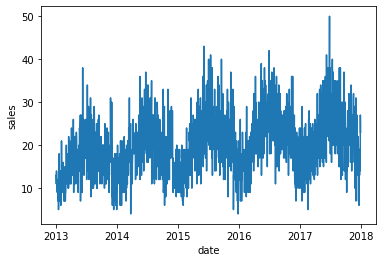

In [35]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df)

<AxesSubplot:xlabel='weekday', ylabel='sales'>

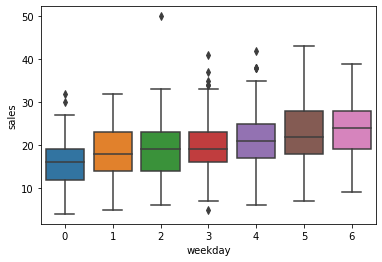

In [36]:
sns.boxplot(x="weekday", y="sales", data=train_df)

In [37]:
#Monday=0, Sunday=6.
#Here we can find the weekends(5,6) has a larger sales, weekdays(0-4) are smaller. There's a few outliers on Monday, Wed.

<AxesSubplot:xlabel='year'>

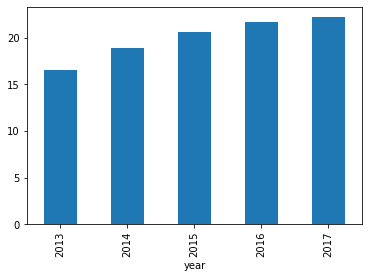

In [38]:
train_df.groupby('year')['sales'].mean().plot.bar()

In [39]:
#sales shows a linear graph, as year increases sales also increases

<AxesSubplot:xlabel='month'>

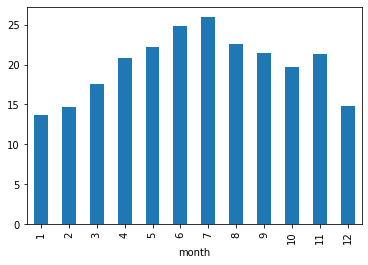

In [40]:
train_df.groupby('month')['sales'].mean().plot.bar()

In [41]:
#From the plot we can see that sales increases gradually and reaches its peak on July month and decreases thereafter

<AxesSubplot:xlabel='weekday'>

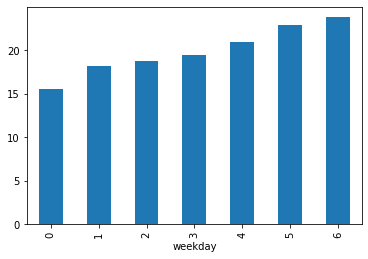

In [42]:
train_df.groupby('weekday')['sales'].mean().plot.bar()

In [43]:
#Least sales on Monday and highest sales on Sunday

# Encoding

In [44]:
train_df.nunique()

date       1826
store         1
item          1
sales        41
year          5
month        12
day         366
weekday       7
dtype: int64

In [45]:
train_df=pd.get_dummies(train_df, columns=['store', 'item', 'weekday','month'])

In [46]:
train_df.head()

,date,sales,year,day,store_1,item_1,weekday_0,weekday_1,weekday_2,weekday_3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2013-01-01,13,2013,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-02,11,2013,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-03,14,2013,3,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-04,13,2013,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-05,10,2013,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
train_df = train_df.set_index('date')
train_df['sales'] = train_df['sales'].astype(float)

train_df

,sales,year,day,store_1,item_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,13.0,2013,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-02,11.0,2013,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-03,14.0,2013,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-04,13.0,2013,4,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-05,10.0,2013,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,14.0,2017,361,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-12-28,19.0,2017,362,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2017-12-29,15.0,2017,363,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
test_df=pd.get_dummies(test_df, columns=['store', 'item', 'weekday','month'])

/var/folders/5r/zxv696r558jf09kl_8b9gyvr0000gn/T/ipykernel_7571/2102810675.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(train_df['sales'], model='additive', freq=365)


<Figure size 432x288 with 0 Axes>

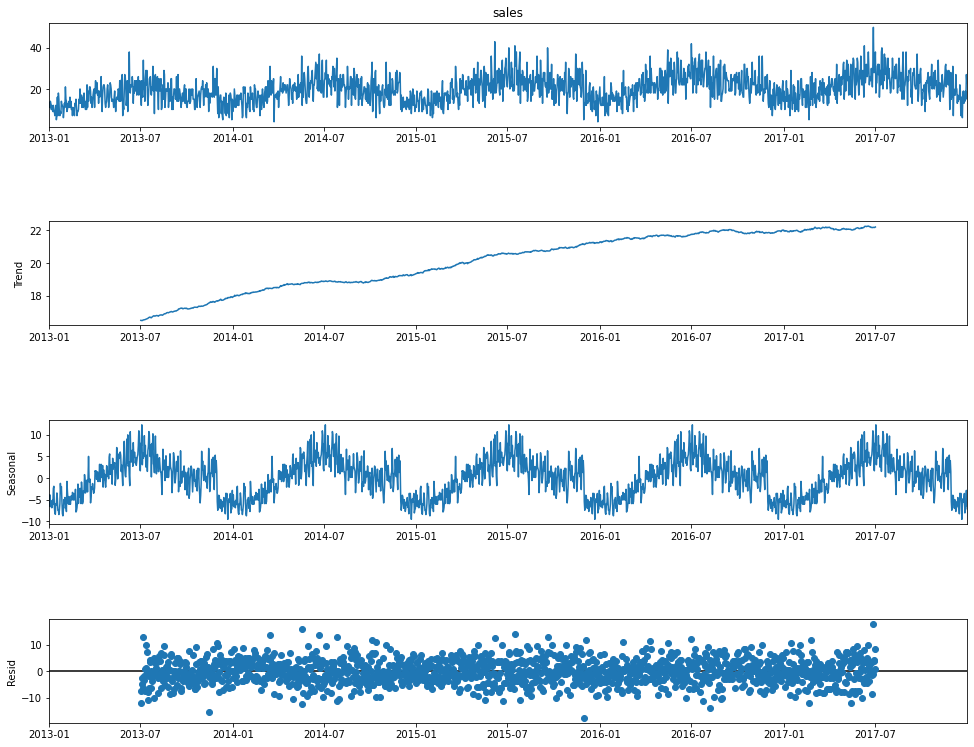

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [51]:
#Playing with a few frequency, the yearly pattern is very obvious. and also we can see a upwards trend. Which means this data is not stationary.

In [52]:
#1st graph: the dataset is not stationary, it would be easier to have a future prediction simply by taking mean values if it was stationary,
#2nd graph: there is an increasing trend over time,
#3rd graph: a repeating pattern is observed, so there is seasonality- moving upwards on July.
#4th graph: residuals are decomposing randomly around 0, so the series is additive.

In [53]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

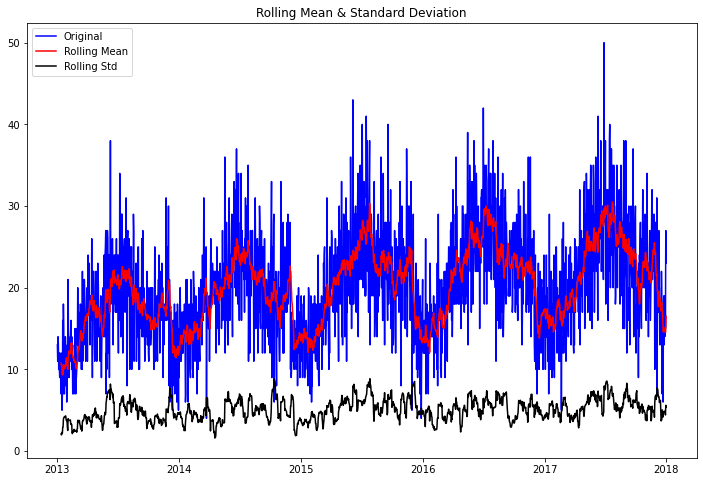

Results of Dickey-Fuller Test:
p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [54]:
test_stationarity(train_df['sales'])

In [55]:
#the smaller p-value, the more likely it's stationary. Here our p-value is 0.036. It's actually not bad, if we use a 5% Critical Value(CV), this series would be considered stationary. But as we just visually found an upward trend, we want to be more strict, we use 1% CV.
#To get a stationary data, there's many techiniques. We can use log, differencing etc...

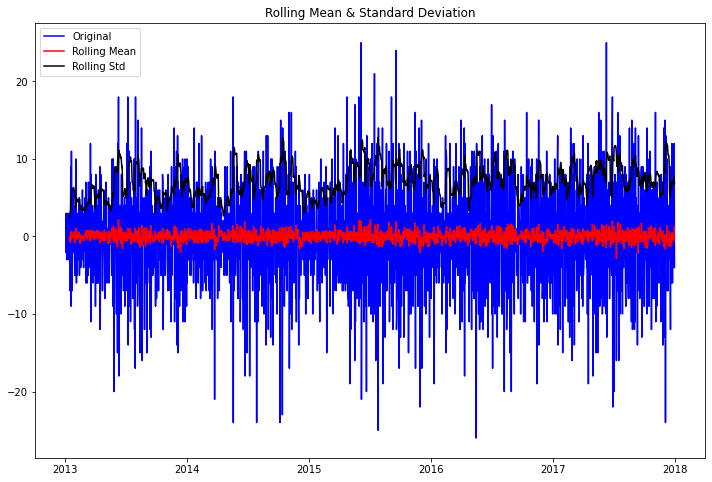

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [56]:
first_diff = train_df.sales - train_df.sales.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

In [57]:
#After differencing, the p-value is extremely small. Thus this series is very likely to be stationary.

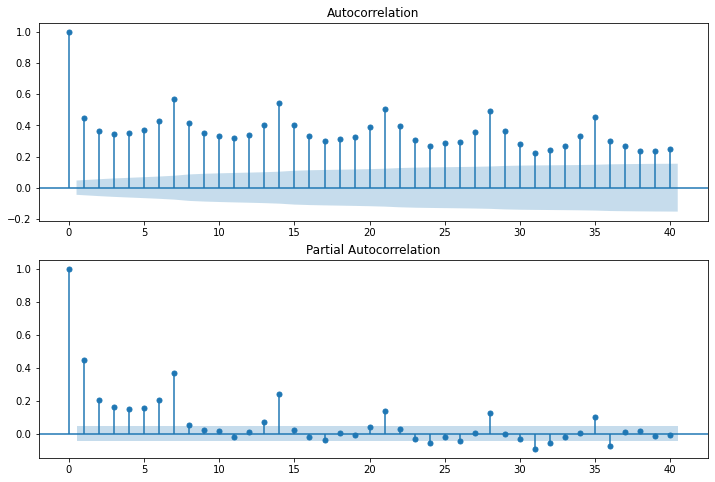

In [58]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.sales, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.sales, lags=40, ax=ax2)# , lags=40

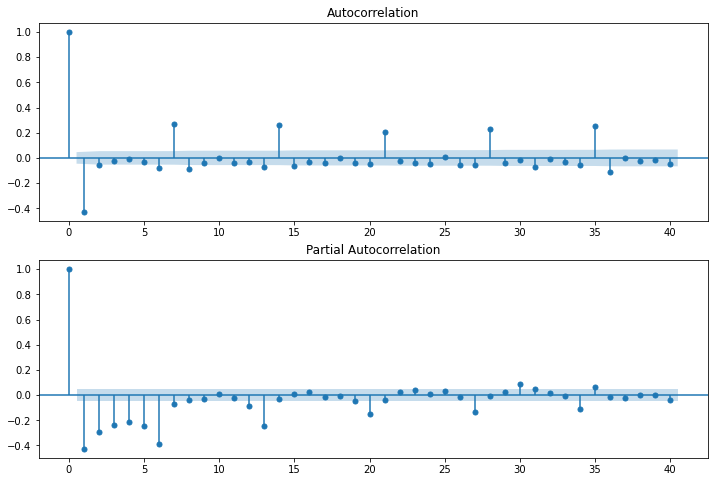

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

In [60]:
## Here we can see the acf and pacf both has a recurring pattern every 7 periods. Indicating a weekly pattern exists. 
# Any time you see a regular pattern like that in one of these plots, you should suspect that there is some sort of 
# significant seasonal thing going on. Then we should start to consider SARIMA to take seasonality into accuont

In [61]:
arima_mod6 = sm.tsa.ARIMA(train_data.sales, (6,1,0)).fit(disp=False)
print(arima_mod6.summary())

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:               912999
Model:                 ARIMA(6, 1, 0)   Log Likelihood            -3358464.248
Method:                       css-mle   S.D. of innovations              9.579
Date:                Sun, 09 Oct 2022   AIC                        6716944.496
Time:                        10:01:18   BIC                        6717038.291
Sample:                             1   HQIC                       6716970.402
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.663e-05      0.002      0.029      0.976      -0.004       0.004
ar.L1.D.sales    -0.8354      0.001   -949.481      0.000      -0.837      -0.834
ar.L2.D.sales    -0.7486      0.001   -7

In [62]:
#It's easy to determin I. In our case, we see the first order differencing make the ts stationary. I = 1.

#AR model might be investigated first with lag length selected from the PACF or via empirical investigation. In our case, it's clearly that within 6 lags the AR is significant. Which means, we can use AR = 6

#To avoid the potential for incorrectly specifying the MA order (in the case where the MA is first tried then the MA order is being set to 0), it may often make sense to extend the lag observed from the last significant term in the PACF.

In [63]:
#We see a recurring correlation exists in both ACF and PACF. So we need to deal with seasonality.

In [64]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_data.sales, trend='n', order=(6,1,0)).fit()
print(sarima_mod6.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67849D+00    |proj g|=  2.05340D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     11      1     0     0   1.897D-05   3.678D+00
  F =   3.6784931523840121     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:               913000
Model:               SARIMAX(6, 1, 0

# Make prediction and evaluation

<AxesSubplot:>

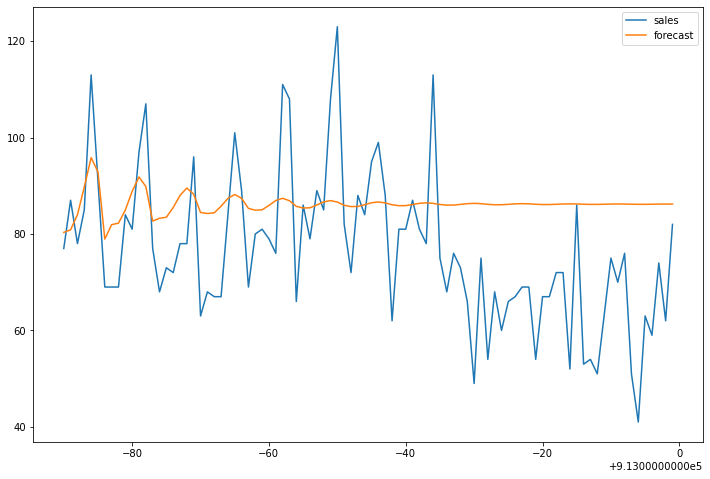

In [65]:
#Take the last 30 days in training set as validation data

start_index = 912910
end_index = 913001
train_data['forecast'] = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
train_data[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

# SARIMAX: adding external variables

In [72]:
# per 1 store, 1 item
storeid = 1
itemid = 1
train_df = train_data[train_data['store']==storeid]
train_df = train_df[train_df['item']==itemid]

train_df['year'] = train_df['date'].dt.year - 2012
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.dayofyear
train_df['weekday'] = train_df['date'].dt.weekday

start_index = 1730
end_index = 1826


In [73]:
# per 1 store, 1 item
storeid = 1
itemid = 1
test_df = test_data[test_data['store']==storeid]
test_df = test_df[test_df['item']==itemid]

test_df['year'] = test_df['date'].dt.year - 2012
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.dayofyear
test_df['weekday'] = test_df['date'].dt.weekday

start_index = 1730
end_index = 1826


In [74]:
train_df = pd.get_dummies(train_df, columns = ['month','weekday'] , prefix = ['month','weekday'])

In [75]:
#test_df = pd.get_dummies(test_df, columns = ['month','weekday'] , prefix = ['month','weekday'])

In [76]:
test_df = pd.get_dummies(test_df, columns = ['month','weekday'] , prefix = ['month','weekday'])
test_df['month_4'] = np.zeros(len(test_df))
test_df['month_5'] = np.zeros(len(test_df))
test_df['month_6'] = np.zeros(len(test_df))
test_df['month_7'] = np.zeros(len(test_df))
test_df['month_8'] = np.zeros(len(test_df))
test_df['month_9'] = np.zeros(len(test_df))
test_df['month_10'] = np.zeros(len(test_df))
test_df['month_11'] = np.zeros(len(test_df))
test_df['month_12'] = np.zeros(len(test_df))

In [77]:
ext_var_list1 = ['date','year', 'day', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']

In [78]:
exog_data1 = train_df[ext_var_list1]
exog_data1 = exog_data1.set_index('date')
exog_data1.head()

,year,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-02,1,2,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-03,1,3,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-04,1,4,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-01-05,1,5,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
exog_data2 = test_df[ext_var_list1]
exog_data2 = exog_data2.set_index('date')
exog_data2.head()

,year,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,6,1,1,0,0,0,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-02,6,2,0,1,0,0,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,6,3,0,0,1,0,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-04,6,4,0,0,0,1,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-05,6,5,0,0,0,0,1,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
train_df = train_df.set_index('date')
train_df.head()

,store,item,sales,forecast,year,day,month_1,month_2,month_3,month_4,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,13,NaN,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2013-01-02,1,1,11,NaN,1,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2013-01-03,1,1,14,NaN,1,3,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2013-01-04,1,1,13,NaN,1,4,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2013-01-05,1,1,10,NaN,1,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
test_df = test_df.set_index('date')
test_df.head()

,id,store,item,year,day,month_1,month_2,month_3,weekday_0,weekday_1,...,weekday_6,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0,1,1,6,1,1,0,0,1,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-02,1,1,1,6,2,1,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,2,1,1,6,3,1,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-04,3,1,1,6,4,1,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-05,4,1,1,6,5,1,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
start_index = '2017-10-01'
end_index = '2017-12-31'

In [83]:
sarimax_mod6 = sm.tsa.statespace.SARIMAX(endog = train_df.sales[:start_index],
                                        exog = exog_data1[:start_index],  
                                        trend='n', order=(6,1,0), seasonal_order=(0,1,1,7)).fit()
print(sarimax_mod6.summary())

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11722D+00    |proj g|=  1.75570D-01

At iterate    5    f=  3.05886D+00    |proj g|=  5.31517D-02

At iterate   10    f=  2.98467D+00    |proj g|=  3.31425D-02

At iterate   15    f=  2.98276D+00    |proj g|=  2.35287D-02

At iterate   20    f=  2.97075D+00    |proj g|=  4.51639D-02

At iterate   25    f=  2.96095D+00    |proj g|=  1.09228D-01

At iterate   30    f=  2.96030D+00    |proj g|=  3.07245D-03

At iterate   35    f=  2.96028D+00    |proj g|=  2.72265D-03

At iterate   40    f=  2.96027D+00    |proj g|=  7.96803D-03

At iterate   45    f=  2.96012D+00    |proj g|=  1.43209D-02

At iterate   50    f=  2.95965D+00    |proj g|=  1.26943D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               sales   No. Observations:                 1735
Model:             SARIMAX(6, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -5135.000
Date:                             Sun, 09 Oct 2022   AIC                          10328.000
Time:                                     10:24:58   BIC                          10486.170
Sample:                                 01-01-2013   HQIC                         10386.509
                                      - 10-01-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
year        -612.9057   1478.269     -0.415      0.678   -3510.260    2284.449
day           -1.6753      

In [103]:
start_index = '2017-10-01'
end_index = '2017-12-30'
end_index1 = '2017-12-31'

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='date'>

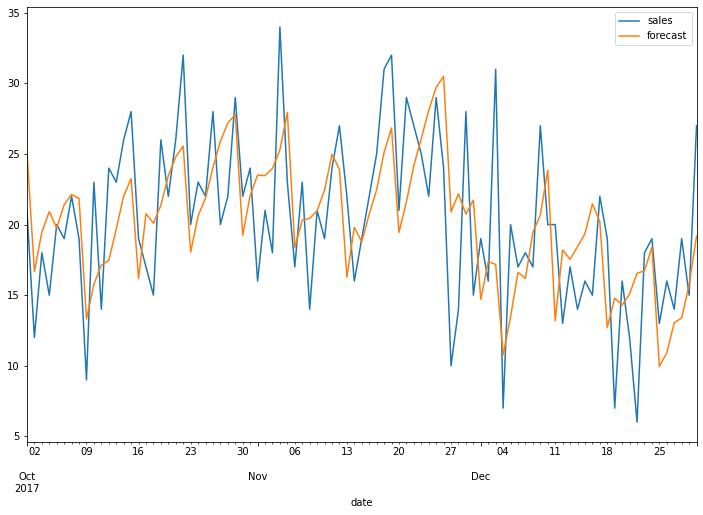

In [104]:
train_df['forecast'] = sarimax_mod6.predict(start = pd.to_datetime(start_index), end= pd.to_datetime(end_index1),
                                            exog = exog_data1[start_index:end_index], 
                                            dynamic= False)  

train_df[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

In [108]:
start_index = '2018-01-01'
end_index = '2018-04-01'
end_index1 = '2018-03-31'

In [109]:
sarimax_mod6 = sm.tsa.statespace.SARIMAX(endog = train_df.sales[:start_index],
                                        exog = exog_data1[:start_index],  
                                        trend='n', order=(6,1,0), seasonal_order=(0,1,1,7)).fit()
print(sarimax_mod6.summary())

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11780D+00    |proj g|=  1.76463D-01

At iterate    5    f=  3.06213D+00    |proj g|=  5.29558D-02

At iterate   10    f=  2.98782D+00    |proj g|=  2.35090D-02

At iterate   15    f=  2.98335D+00    |proj g|=  1.66994D-01

At iterate   20    f=  2.96782D+00    |proj g|=  1.24317D-01

At iterate   25    f=  2.96237D+00    |proj g|=  4.31311D-02

At iterate   30    f=  2.96225D+00    |proj g|=  1.90970D-03

At iterate   35    f=  2.96223D+00    |proj g|=  1.36801D-02

At iterate   40    f=  2.96173D+00    |proj g|=  9.83511D-02

At iterate   45    f=  2.96142D+00    |proj g|=  1.21468D-03

At iterate   50    f=  2.96142D+00    |proj g|=  1.10028D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               sales   No. Observations:                 1826
Model:             SARIMAX(6, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -5407.546
Date:                             Sun, 09 Oct 2022   AIC                          10873.093
Time:                                     13:43:33   BIC                          11032.752
Sample:                                 01-01-2013   HQIC                         10931.999
                                      - 12-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
year        -611.4001   1523.012     -0.401      0.688   -3596.449    2373.649
day           -1.6745      

/Users/nithingopinath/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='date'>

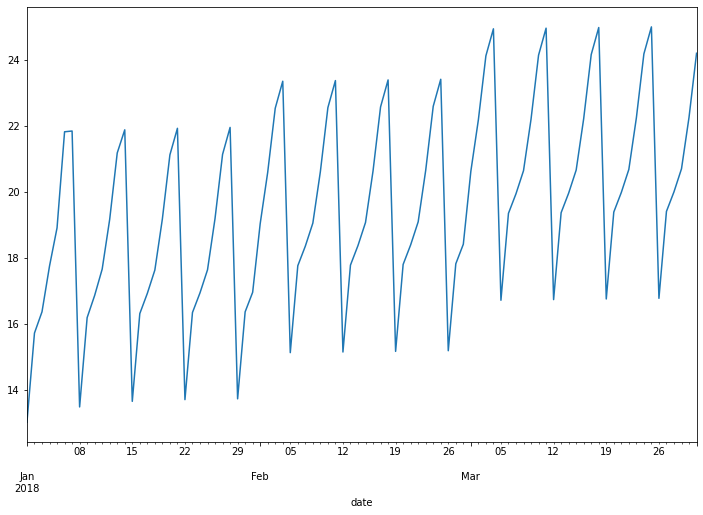

In [110]:
test_df['forecast'] = sarimax_mod6.predict(start = pd.to_datetime(start_index), end= pd.to_datetime(end_index1),
                                           exog = exog_data2[start_index:end_index], 
                                           dynamic= False)  

test_df[start_index:end_index]['forecast'].plot(figsize=(12, 8))